In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


df = pd.read_csv("happyscore_income.csv")

# Display the first few rows of the dataset
print(df.head())



     country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
0    Armenia                   37.0               4.9              2.42   
1     Angola                   26.0               4.3              3.19   
2  Argentina                   60.0               7.1              1.91   
3    Austria                   59.0               7.2              2.11   
4  Australia                   65.0               7.6              1.80   

   avg_income  median_income  income_inequality  \
0     2096.76    1731.506667          31.445556   
1     1448.88    1044.240000          42.720000   
2     7101.12    5109.400000          45.475556   
3    19457.04   16879.620000          30.296250   
4    19917.00   15846.060000          35.285000   

                          region  happyScore      GDP  country.1  
0   'Central and Eastern Europe'       4.350  0.76821    Armenia  
1           'Sub-Saharan Africa'       4.033  0.75778     Angola  
2  'Latin America and Caribbean'       6.

In [2]:
df.describe()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,48.729730,5.936937,2.124595,6442.751416,5186.005304,38.417805,5.421910,0.841909
std,12.364131,1.356394,0.316546,6479.533692,5587.037239,8.375557,1.180801,0.387591
min,19.000000,2.500000,1.380000,572.880000,415.480000,24.215000,2.839000,0.015300
25%,40.000000,5.100000,1.910000,1519.388684,1167.717333,32.182857,4.568000,0.509930
50%,48.000000,6.000000,2.130000,3889.320000,2646.973333,36.480000,5.268000,0.918610
75%,57.000000,7.000000,2.330000,7867.402500,6581.124643,43.380000,6.392000,1.149485
max,74.000000,8.500000,3.190000,26182.275000,22240.230000,63.726667,7.587000,1.563910


In [3]:
# Extract the relevant columns for correlation analysis
income = df['median_income']
happiness = df['happyScore']

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(income, happiness)

# Print the correlation coefficient
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")


Pearson Correlation Coefficient: 0.760


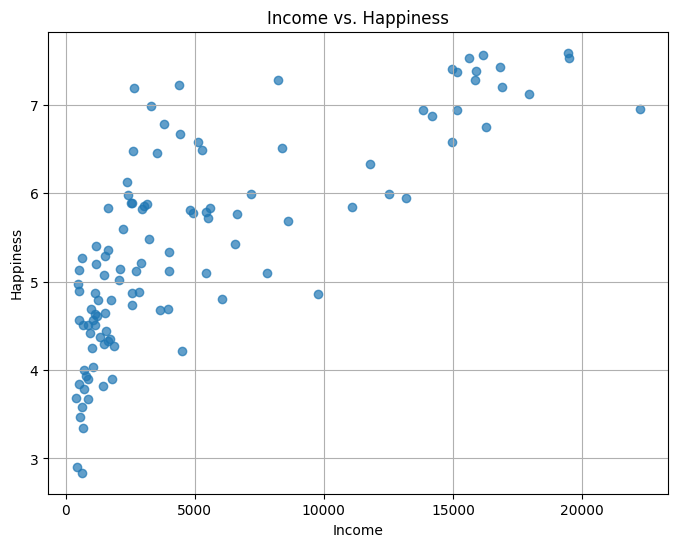

In [4]:

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(income, happiness, alpha=0.7)
plt.title('Income vs. Happiness')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.grid(True)

# Display the plot
plt.show() 

In [5]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# Load the dataset
df = pd.read_csv("mario.csv")
df.head()

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24


In [6]:
df['group'].value_counts()

group
ai         240
control    240
newhire    180
Name: count, dtype: int64

In [7]:

# Perform One-Way ANOVA
model = sm.ols('totalingred ~ C(group)', data=df).fit()
anova_table = anova_lm(model)

# Print the ANOVA table
print(anova_table)

             df        sum_sq    mean_sq         F    PR(>F)
C(group)    2.0     56.379040  28.189520  1.464875  0.231861
Residual  657.0  12643.069444  19.243637       NaN       NaN
